NB:Le dataset avec lequel on a travaillé est trés volumineux, c'est pourquoi l'éxcution de certaines instructions peut prendre plusieurs minutes.

## 1/Importation  des données

In [1]:
import pandas as pd

In [2]:
order_products_prior = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
order_products_train = pd.read_csv("order_products__train.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")


## 2/Exploration des données

#### a/ Valeurs manquantes: (Data Cleaning)

In [4]:
 order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [5]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [6]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [7]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [8]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [9]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

D'apres les résultats trouvés seulement la colonne "days_since_prior_order" du dataset ORDERS contient des valeurs nulles.

In [10]:
orders[orders["days_since_prior_order"].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


D'aprés le résultat ci-dessus on constate que la colonne "days_since_prior_order" est nulle seulement quand "order_number" == 1 
ce qui est logique car avant la premiére commande on n'a aucune commande

Pour confirmer ce qu'on a constaté, on va vérifier si les valeurs nulles dans "orders.csv" sont seulement présentes dans les premiers commandes de chaque utilisateur:

In [11]:
print(orders[orders["order_number"]==1].isnull().sum()) #Nan valeurs où "order_number"==1 

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


Donc on va remplacer ces valeurs nulles par des zéros car avant la premiére commande on n'a aucune commande précédente donc 
"days_since_prior_order" est logiquement égale à 0 :

In [3]:
orders=orders.fillna(0)

In [4]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [14]:
# Statistiques de base pour le dataframe orders 
print(orders.describe())

           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.421083e+06  
mean        1.345202e+01            1.044488e+01  
std         4.226088e+00            9.308727e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01            1.500000e+01  
max   

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


#### b/ Fusionner les données :

In [5]:
data=pd.concat([order_products_prior,order_products_train]).sort_values(by=['order_id'])

In [6]:
data = pd.merge(left = data, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

In [7]:
data = pd.merge(left = data, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)

In [8]:
data = pd.merge(left = data, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)


In [9]:
data = pd.merge(left = data, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)


In [10]:
col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

In [11]:
data[col_order]

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
2,112108,1,47209,24,4,7,0,Organic Hass Avocado,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,25247,3421083,11352,78,19,7,0,Organic Mini Sandwich Crackers Peanut Butter,crackers,snacks,prior,24,2,6,21.0
33819102,25247,3421083,5020,3,19,10,1,Organic Sweet & Salty Peanut Pretzel Granola ...,energy granola bars,snacks,prior,24,2,6,21.0
33819103,25247,3421083,24852,24,4,9,1,Banana,fresh fruits,produce,prior,24,2,6,21.0
33819104,25247,3421083,21162,92,18,3,0,Organic Mixed Berry Yogurt & Fruit Snack,baby food formula,babies,prior,24,2,6,21.0


In [18]:
len(data)

33819106

## 3/ Quelques analyses:

#### a/ Distribution de la variable cible (reordered) :

In [20]:
# Calculate the proportion of reordered products

reordered_prop_train = data[data["eval_set"]=="train"]['reordered'].mean()

print('Proportion of reordered products TRAIN SET: {:.2%}'.format(reordered_prop_train))

reordered_prop_prior = data[data["eval_set"]=="prior"]['reordered'].mean()

print('Proportion of reordered products PRIOR SET: {:.2%}'.format(reordered_prop_prior))


Proportion of reordered products TRAIN SET: 59.86%
Proportion of reordered products PRIOR SET: 58.97%


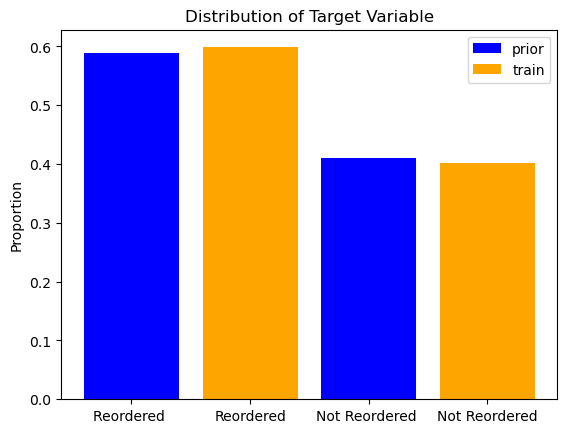

In [21]:
# Create a bar plot of the proportion of reordered products
plt.bar(['Reordered '], [reordered_prop_prior],color="blue",label="prior")
plt.bar(['Reordered'], [reordered_prop_train],color="orange",)
plt.bar(['Not Reordered '], [1 - reordered_prop_prior],color="blue")
plt.bar(['Not Reordered'], [1 - reordered_prop_train],color="orange",label="train")
plt.title('Distribution of Target Variable')
plt.ylabel('Proportion')
plt.legend()
plt.show()

-On constate que la distribution est similaire dans Prior et Train Set c'est à dire que les utilisateurs commandent de nouveau les mémes produits qu'ils ont commandés de nouveau dans leurs commandes anciennes.<br/>
-Environ 60 % des cas, le produit a été commandé de nouveau.

#### b/ Nombre des utilisateurs total, du set train, et du set test:

In [113]:
total=data["user_id"].nunique()
print("Nombre total des utilisateurs : {}".format(total))

Nombre total des utilisateurs : 206209


In [16]:
train=orders[orders["eval_set"]=="train"]["user_id"].nunique()
print("Nombre total des utilisateurs du set train : {}".format(train))

Nombre total des utilisateurs du set train : 131209


In [17]:
test=orders[orders["eval_set"]=="test"]["user_id"].nunique()
print("Nombre total des utilisateurs du set test : {}".format(test))

Nombre total des utilisateurs du set test : 75000


<b>=> Donc les utilisateurs sont divisés entre Train et Test<b>

#### c/ Histogramme du nombre des commandes par heure de la journée:

In [25]:
import matplotlib.pyplot as plt

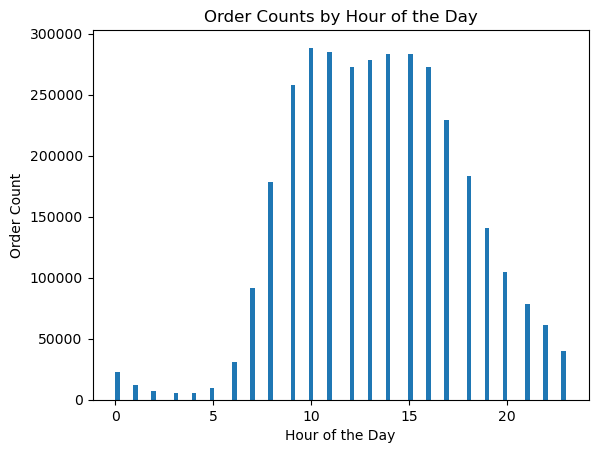

In [24]:
plt.hist(orders['order_hour_of_day'], bins=100)
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.title('Order Counts by Hour of the Day')
plt.show()

-La majorité des commandes sont à partir de 6h du matin jusqu'a minuit <br/>
-Une minorité des commandes sont à partir de minuit à 6h

#### d/ Répartition des nombres des commandes selon leurs occurrences :

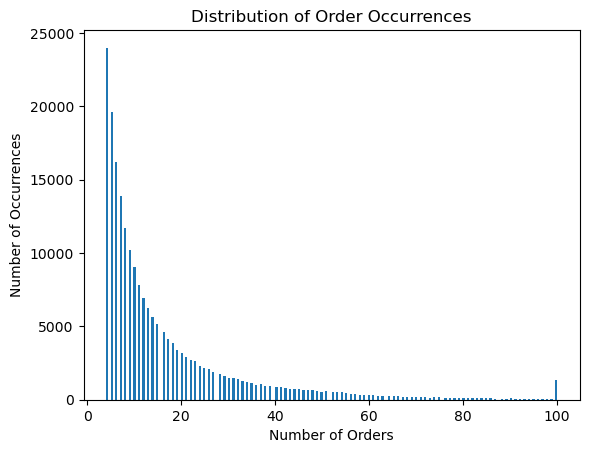

In [7]:
# Count the occurrences of each order in the dataset
order_counts = orders['user_id'].value_counts() #number of orders for each user

# Plot a histogram of order occurrence counts
plt.hist(order_counts, bins=200, log=False)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Order Occurrences')
plt.show()

In [8]:
order_counts.min()

4

In [9]:
order_counts.max()

100

-Pour chaque utilisateur, nous avons environ 4 à 100 commandes.<br/>
-Il y a très peu d'utilisateurs qui ont passé plus de 60 commandes.<br/>
-Le nombre de commandes maximale pour tout utilisateur est de 100.

#### e/ Les produits les plus commandés de nouveau:

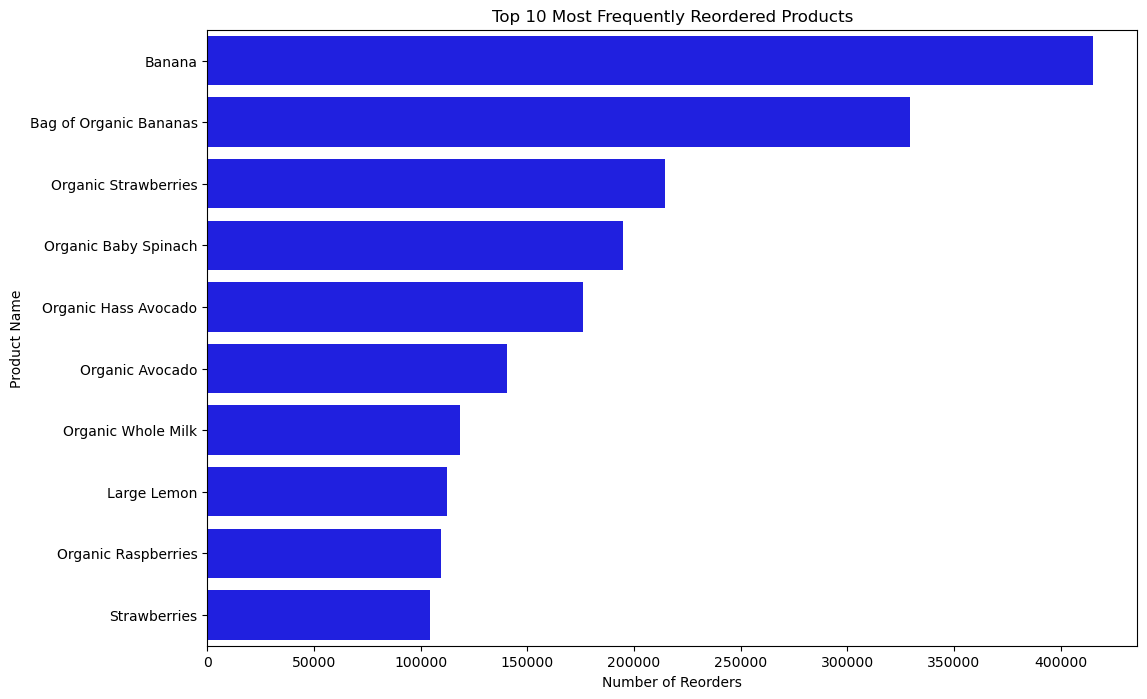

In [13]:
import seaborn as sns

# Create a DataFrame with the count of each product and the number of times it was reordered
product_count = data.groupby('product_id')['reordered'].agg(['count', 'sum']) 
                                                    #count:count of the number of times each product appears in the dataset
                                                    #sum:the sum of how many times each product was reordered

product_count.columns = ['total_orders', 'total_reorders'] #  product_count a dataframe with 3 columns:"product_id" ,
product_count.reset_index(inplace=True)                    # "total_orders" and "total_reorders" 

# Merge the product name with the product count DataFrame
product_count = pd.merge(product_count, products[['product_id', 'product_name']], on='product_id')
                                          # product_count now is a dataframe with 4 columns:"product_id",
                                          # "total_orders" ,"total_reorders" and "product_name"
# Sort the DataFrame by the total number of orders
product_count = product_count.sort_values('total_reorders', ascending=False)

# Get the top 10 most frequently ordered products
top_10_products = product_count.head(10)

# Create a bar plot of the top 10 products
plt.figure(figsize=(12,8))
sns.barplot(x='total_reorders', y='product_name', data=top_10_products, color='b')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.title('Top 10 Most Frequently Reordered Products')
plt.show()


In [3]:
products["product_name"].nunique()

49688

-Il y a au total 49688 produits. <br/>
-On constate que la plupart des produits commandés sont des aliments biologiques ; des fruits frais.<br/>
-Les bananes sont le produitd le plus recommandé.<br/>
-Les 10 produits les plus fréquemment commandés sont de nature biologique.

#### f/ Les produits les moins commandés de nouveau:

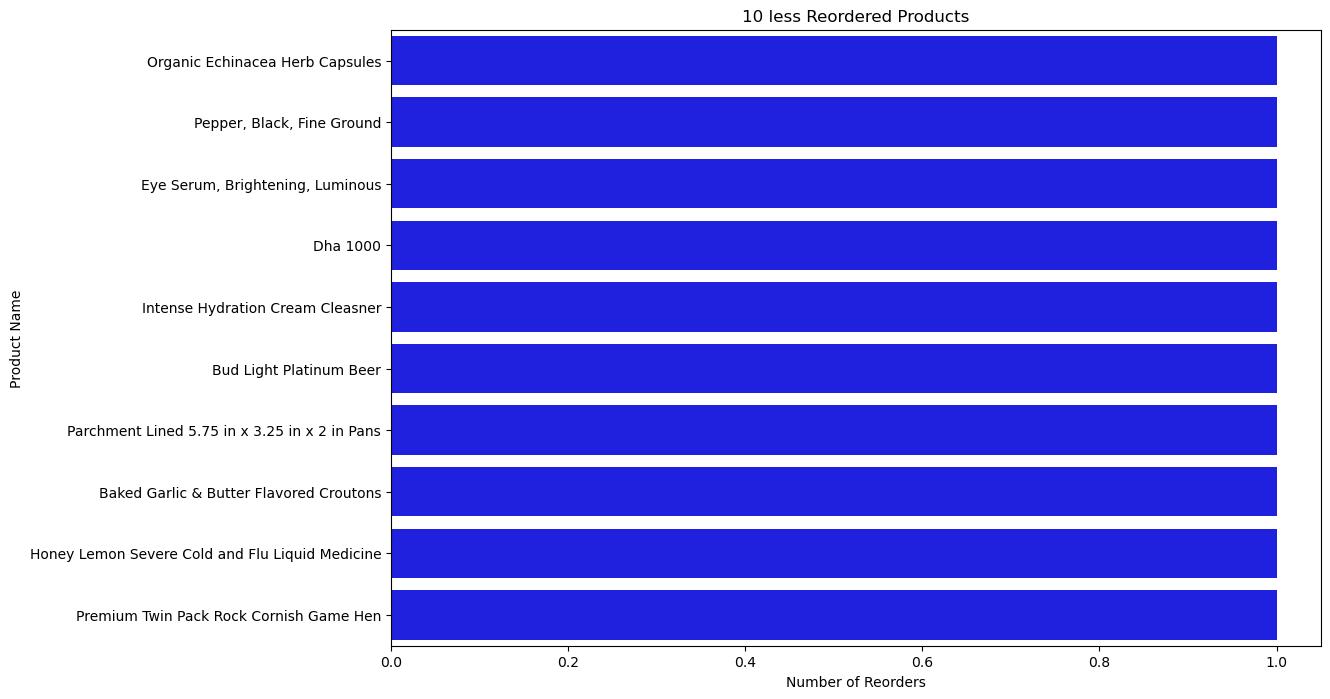

In [14]:
# The less 10 frequently reordered products
buttom_10_products = product_count[product_count["total_reorders"]!=0].tail(10)

# Create a bar plot of the less 10 reordered products
plt.figure(figsize=(12,8))
sns.barplot(x='total_reorders', y='product_name', data=buttom_10_products, color='b')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.title('10 less Reordered Products')
plt.show()

On constate que les produits de hair care, skin care, kitchen supplies sont les moins commandés de nouveau.

#### g/ Des produits qui n'ont jamais été recommandés:

In [36]:
#Products that were never reordered :
buttom_10_products=product_count[product_count["total_reorders"]==0]["product_name"]
print("Parmi 49688 produits {} produits ne sont jamias recommandés".format(len(buttom_10_products)))
print("------------------------------------------------------------ ")
print("Produits qui ne sont jamais recommandés:\n {} ".format(buttom_10_products))

Parmi 49688 produits 4082 produits ne sont pas recommandés
Produits qui ne sont jamais recommandés:
 2092                          Neti Mist Sinus Spray
20579                    Purple MarshMallow Bunnies
19748               Organic Fingerling Potatoes Bag
22008                               Fancy Pimientos
33871    Fruit & Cream Instant Oatmeal Variety Pack
                            ...                    
45968                    12 Inch Taper Candle White
37378                  Burts Thick Cut Potato Chips
15331             Full Size Candy Bars Variety Pack
15328         Deep Woods Insect Repellent VIII, Dry
38651               Dinner Soft Country Style Rolls
Name: product_name, Length: 4082, dtype: object 


#### h/  Les  allées des produits les plus commandées de nouveau :

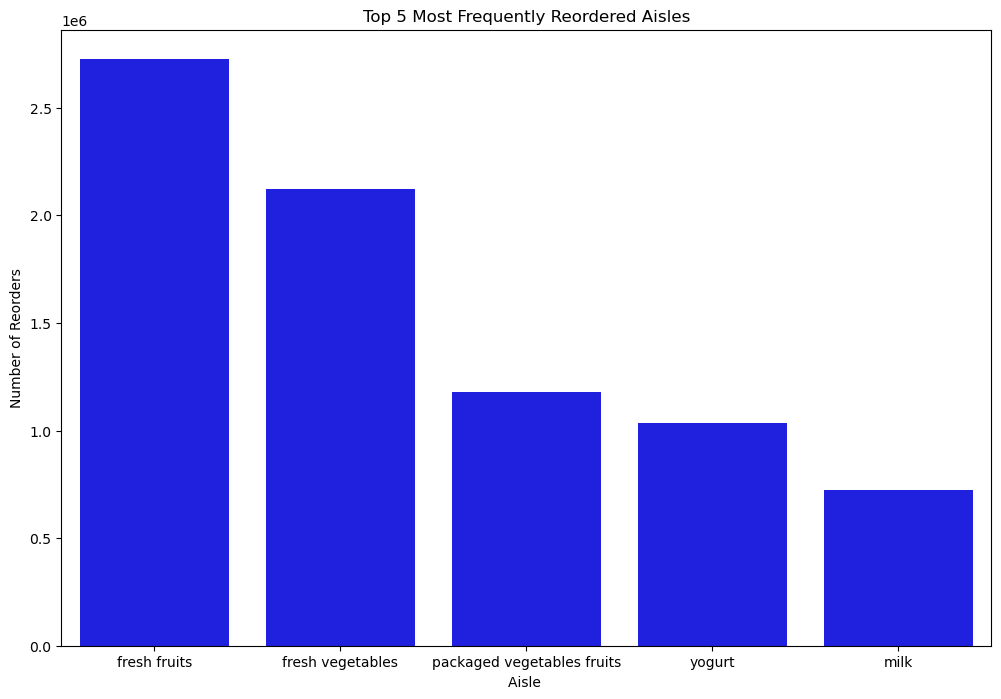

In [37]:
# Create a DataFrame with the count of each aisle and the number of times it was reordered
aisle_count =data.groupby('aisle_id')['reordered'].agg(['count', 'sum'])                                         

aisle_count.columns = ['total_orders', 'total_reorders']
#aisle_count.reset_index(inplace=True)                    

# Merge the aisle name with the aisle count DataFrame
aisle_count = pd.merge(aisle_count, aisles[['aisle_id', 'aisle']], on='aisle_id')
                                         
# Sort the DataFrame by the total number of reorders
aisle_count = aisle_count.sort_values('total_reorders', ascending=False)

# Get the top 10 most frequently reordered aisles
top_5_aisles = aisle_count.head(5)

# Create a bar plot of the top 10 aisles
plt.figure(figsize=(12,8))
sns.barplot(x='aisle', y='total_reorders', data=top_5_aisles, color='b')
plt.xlabel('Aisle ')
plt.ylabel('Number of Reorders')
plt.title('Top 5 Most Frequently Reordered Aisles')
plt.show()

In [38]:
aisles["aisle"].nunique()

134

-On a au total 134 allées différentes. <br/>
-On remarque que la plupart des produits commandés de nouveau sont dans les rayons des fruits frais et des légumes frais.<br/>
-D'autres allées fréquemment commandés de nouveau : les yaourts, les légumes emballés et les laits.

#### i/ Les départements des produits les plus recommandées :

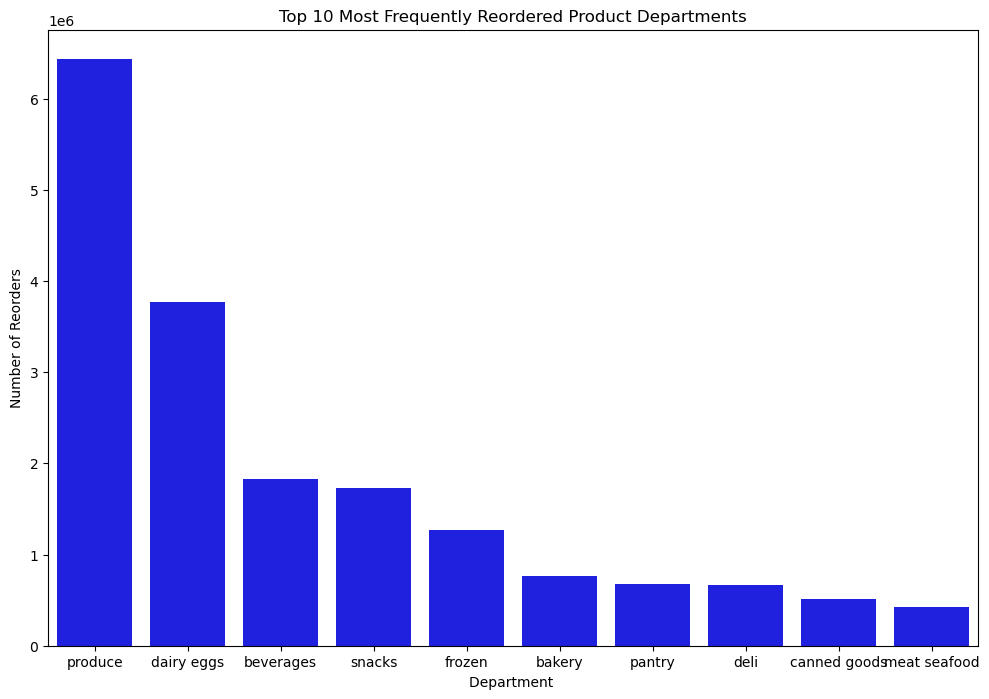

In [40]:
# Create a DataFrame with the count of each dep and the number of times it was reordered frpm
dep_count =data.groupby('department_id')['reordered'].agg(['count', 'sum']) 
                                                   

dep_count.columns = ['total_orders', 'total_reorders']
#dep_count.reset_index(inplace=True)                    "

# Merge the dep with the dep count DataFrame
dep_count = pd.merge(dep_count, departments[['department_id', 'department']], on='department_id')
                                         
# Sort the DataFrame by the total number of orders
dep_count = dep_count.sort_values('total_reorders', ascending=False)

# Get the top 10 most frequently ordered products dep
top_10_departments = dep_count.head(10)

# Create a bar plot of the top 10 dep
plt.figure(figsize=(12,8))
sns.barplot(x='department', y='total_reorders', data=top_10_departments, color='b')
plt.xlabel('Department ')
plt.ylabel('Number of Reorders')
plt.title('Top 10 Most Frequently Reordered Product Departments')
plt.show()

In [41]:
departments["department"].nunique()

21

-Au totale on a 21 departments. <br/>
-Comme le montre l'analyse des départements, la plupart des produits commandés de nouveau proviennent du département des légumes frais,fruits, herbes,... ,et du département des œufs laitiers contenant du yaourt, du lait, des œufs, du fromage,... <br/>

#### j/ Répartition des commandes selon les jours entre deux commandes successives :

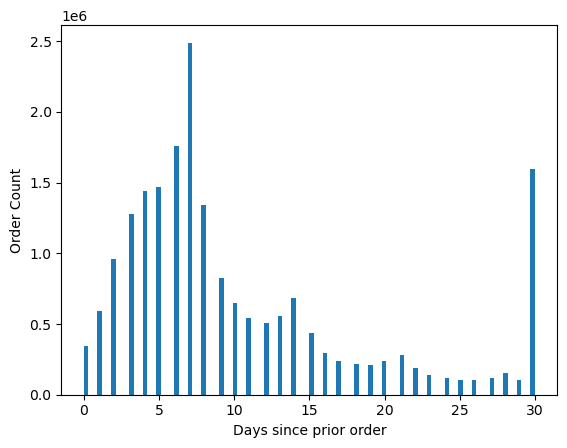

In [15]:
# Histogram of order counts by days_since_prior_order
plt.hist(data[data["reordered"]==1]['days_since_prior_order'], bins=100)
plt.xlabel('Days since prior order')
plt.ylabel('Order Count')

plt.show()

-La plupart des clients repassent leurs commandes aprés une semaines(jour 7) ou un mois (jour 30) <br/>
-Une minorité des utilisateurs passent plusieurs commandes pendant le jour 0 (meme jour que leur commande précédente) 

## 4/ Entraînement du modèle :

Les données sont divisée en trois parties: Train ,Test et Prior.<br/>
-La partie Prior va étre utilisée pour l'entrainement du modèle. <br/>
-La partie Train va étre utilisée pour le test du modèle. <br/>
-Et puisque on n'a pas les résultats du variable cible (reordered) pour la partie Test , on va l'utiliser pour la prédiction des nouvelles valeurs.


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

On va ajouter une nouvelle colonne aux features pour aider notre modèle et avoir des meilleurs résultats.<br/>
La colonne ajoutée est le nombre de fois un produit est commandé de nouveau par chaque utilisateur.

In [13]:
#Calculate the total number of reorders of each product for each user: 
total_orders_of_product=data.groupby(['user_id', 'product_id'])['reordered'].sum().reset_index().rename(columns={'reordered': 'total_orders'})
#total_orders_of_product.reset_index 

total_orders_of_product

,user_id,product_id,total_orders
0,1,196,10
1,1,10258,9
2,1,10326,0
3,1,12427,9
4,1,13032,3
...,...,...,...
13863741,206209,43961,2
13863742,206209,44325,0
13863743,206209,48370,0
13863744,206209,48697,0


In [14]:
#merge the new column with our DataFrame "data":
new_data=pd.merge(data, total_orders_of_product, on=['user_id', 'product_id'], how='left')

In [68]:
#new_data[(new_data["user_id"]==25247 ) & (new_data["product_id"]==24852)]

In [15]:
X_train=new_data[new_data["eval_set"]=="prior"].drop(['order_id','reordered','aisle_id','department_id',"eval_set","aisle","department","product_name"], axis=1)

In [16]:
y_train=new_data[new_data["eval_set"]=="prior"]["reordered"]

In [17]:
X_test=new_data[new_data["eval_set"]=="train"].drop(['order_id','reordered','aisle_id','department_id',"eval_set","aisle","department","product_name"], axis=1)


In [18]:
y_test=new_data[new_data["eval_set"]=="train"]["reordered"]

In [19]:
#max_iter=700
clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=700, random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=700, random_state=42)

In [20]:
y_pred1 = clf.predict(X_test)

## 5/Evaluation du modéle

In [21]:
accuracy_score(y_test, y_pred1)

0.9813125218020579

In [22]:
f1 = f1_score(y_test, y_pred1)
f1

0.984143014990443

In [23]:
from sklearn import metrics 

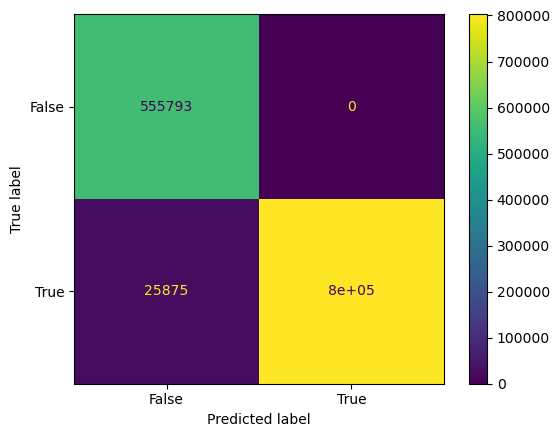

In [26]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]) 
cm_display.plot()
plt.show()

In [27]:
print("Nombre itérations  : {}".format(clf.n_iter_))

Nombre itérations  : 19


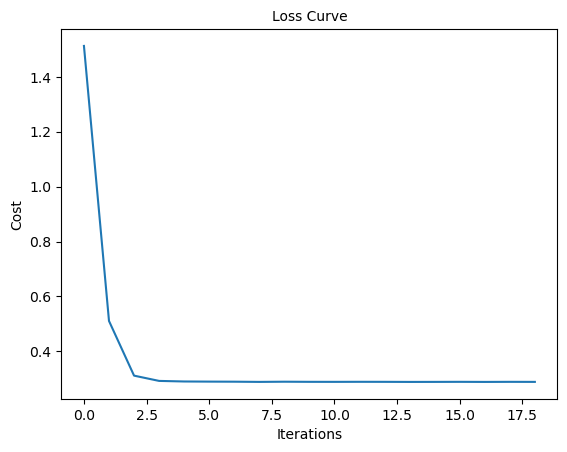

In [28]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=10)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## 6/ Prédiction de nouvelles valeurs

In [20]:
#Extracting the test orders to predict their target value "reordered"
o=orders[orders["eval_set"]=="test"]

In [105]:
#Creating the newTestDataFrame
#drop the unwanted columns
#d=new_data.drop(['order_id','reordered',"eval_set",'aisle_id','department_id',"aisle","department","product_name"], axis=1)

In [ ]:
#Merging data
#d=pd.merge( d, o,on=['product_id','user_id'], how='left').sort_values(by=['user_id']).reset_index(drop=True)
e=pd.merge( new_data, o,on=['user_id','order_id'], how='left').sort_values(by=['user_id']).reset_index(drop=True)

In [ ]:
e=e[["product_id","user_id","add_to_cart_order" , "order_number","order_dow" ,"order_hour_of_day" ,"days_since_prior_order" ,"total_orders"]]

In [200]:
#Predicting the target values of the test orders
y_pred_new = clf.predict(e)